In [2]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt

df = ak.stock_us_daily(symbol="AAPL", adjust="qfq")



In [3]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df=df['2010-01-01':'2020-12-31']
df

,open,high,low,close,volume
date,,,,,
2010-01-04,0.1940,0.2322,0.1565,0.2218,16137968.0
2010-01-05,0.2358,0.2711,0.1876,0.2211,20494531.0
2010-01-06,0.2279,0.2583,0.1090,0.1151,17732950.0
2010-01-07,0.1340,0.1429,0.0376,0.0726,15649371.0
2010-01-08,0.0822,0.1354,0.0379,0.1293,14369803.0
...,...,...,...,...,...
2020-12-24,128.8350,130.9750,128.6150,129.4850,54930064.0
2020-12-28,131.5050,134.8550,131.0250,134.2050,124486237.0
2020-12-29,135.5650,136.3050,131.8550,132.3850,121047324.0


In [45]:
ma5=df['close'].rolling(5).mean()
ma5=ma5[50:300]

In [46]:
ma30=df['close'].rolling(30).mean()
ma30=ma30[50:300]

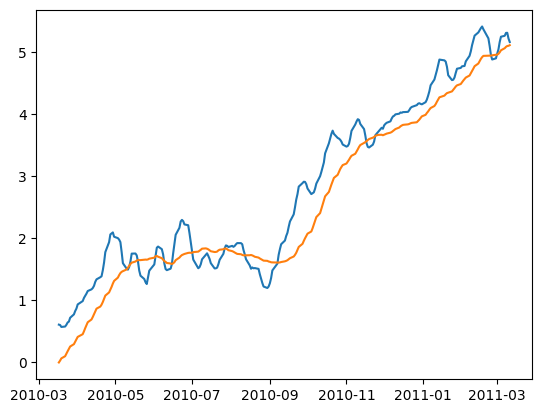

In [47]:
plt.plot(ma5)
plt.plot(ma30)

In [48]:
s1=ma5<ma30
s1

date
2010-03-17    False
2010-03-18    False
2010-03-19    False
2010-03-22    False
2010-03-23    False
              ...  
2011-03-07    False
2011-03-08    False
2011-03-09    False
2011-03-10    False
2011-03-11    False
Name: close, Length: 250, dtype: bool

In [49]:
s2=ma5>ma30
s2

date
2010-03-17    True
2010-03-18    True
2010-03-19    True
2010-03-22    True
2010-03-23    True
              ... 
2011-03-07    True
2011-03-08    True
2011-03-09    True
2011-03-10    True
2011-03-11    True
Name: close, Length: 250, dtype: bool

In [51]:
golden_cross=s1&s2.shift(1)
golden_cross
df[50:300].loc[golden_cross]

,open,high,low,close,volume
date,,,,,
2010-05-11,1.5658,1.8533,1.5179,1.7329,30363502.0
2010-05-19,1.4822,1.6043,1.3161,1.4408,36627466.0
2010-06-09,1.5526,1.5679,1.2318,1.2572,30497516.0
2010-07-02,1.5176,1.5333,1.2572,1.3908,24803483.0
2010-08-13,1.5590,1.5672,1.4676,1.4679,12673805.0
2010-11-17,3.3286,3.4283,3.2058,3.3036,17086914.0
2011-02-25,4.9022,5.0154,4.8858,5.0058,13368900.0


In [53]:
df[50:300].loc[-(s1|s2.shift(1))] # Death cross

,open,high,low,close,volume
date,,,,,
2010-03-17,0.6036,0.6590,0.5454,0.5758,16076915.0
2010-05-13,1.9722,2.0358,1.7286,1.7986,21402707.0
2010-06-02,2.0193,2.0286,1.8690,1.9983,24571856.0
2010-06-16,1.8965,2.1340,1.8797,2.1161,27981801.0
2010-07-27,1.8883,2.0286,1.8679,2.0029,20879673.0
2010-09-08,1.8493,2.0140,1.8251,1.9615,18802723.0
2010-11-24,3.7143,3.8358,3.7054,3.8143,14795448.0
2011-03-01,5.2668,5.2758,4.9886,5.0468,16018591.0
